In [2]:
import pandas as pd
import os
import numpy as np
import yaml
import sys
import pathlib
from pathlib import Path

DIR = 'us_import1'
fpath = os.path.join('./../generated_data_v1/' + DIR + '/serialized_train_data.csv')
OP_DIR = os.path.join('./processed')

_path = Path(str(OP_DIR))
_path.mkdir( parents=True, exist_ok=True)
df = pd.read_csv(fpath,index_col=None)
df.columns

# create graph
enity_types = ['ConsigneePanjivaID','HSCode','PortOfLading','PortOfUnlading','ShipmentDestination','ShipmentOrigin','ShipperPanjivaID']

# create graph
enity_types = ['ConsigneePanjivaID','HSCode','PortOfLading','PortOfUnlading','ShipmentDestination','ShipmentOrigin','ShipperPanjivaID']
entity_dict = {}

for e in enity_types:
    print(e , 'Count : ', len(set(df[e])))
    items = list(sorted(set(df[e])))
    n_df = pd.DataFrame({e: items})
    fname = 'nodes_{}.csv'.format(e)
    fpath = os.path.join(OP_DIR, fname)
    print(' Writing to file {}'.format(fpath))
    n_df.to_csv(fpath,index=False)
# ------------
# Edges
# ------------

edge_types = [
    ['ShipperPanjivaID','HSCode'],
    ['ConsigneePanjivaID','HSCode'],
    ['ShipperPanjivaID','ConsigneePanjivaID'],
    ['PortOfLading','ShipperPanjivaID'],
    ['PortOfLading','PortOfUnlading'],
    ['PortOfUnlading','ConsigneePanjivaID'],
    ['ShipmentDestination','PortOfUnlading'],
    ['PortOfLading','ShipmentOrigin'],
    ['ShipmentDestination', 'ConsigneePanjivaID'],
    ['ShipperPanjivaID','ShipmentOrigin']
]
num_edges = 0

for edge_type in edge_types:
    e_df = df[edge_type]
    e_df = e_df.groupby(edge_type).size().reset_index(name="count")
    num_edges += len(e_df)
    print('E type ', edge_type, ' count : ', len(e_df))
    name = '_'.join(sorted(edge_type))
    cols= list(e_df.columns)
    col1 = cols[0]
    col2 = cols[1]
    e_df = e_df.rename(columns= { col1:'source', col2:'target' })
    # Save file 
    fname = name + '_edges.csv'
    fpath = os.path.join(OP_DIR, fname)
    print('.Writing to {}'.format(fpath))
    e_df.to_csv(fpath,index=False)

# =======================
# Create data for Hin2vec 
# =======================

all_edges_df = None
e_type_idx = 0
for edge_type in edge_types:
    e_df = df[edge_type]
    e_df = e_df.groupby(edge_type).size().reset_index(name="count")
    num_edges += len(e_df)
    print('E type ', edge_type, ' count : ', len(e_df))
    name = '_'.join(sorted(edge_type))
    cols= list(e_df.columns)
    col1 = cols[0]
    col2 = cols[1]
    e_df = e_df.rename(columns= { col1:'source', col2:'target' })
    try:
        del e_df['count']
    except:
        pass
    e_df['type'] = e_type_idx
    e_type_idx += 1
    
    if all_edges_df is None:
        all_edges_df = e_df
    else:
        all_edges_df = all_edges_df.append(e_df,ignore_index=True)
    
fname = name + 'hin2vec_input.txt'
fpath = os.path.join(OP_DIR, fname)
print('.Writing to {}'.format(fpath))
all_edges_df.to_csv(fpath, index = False, header = False, sep = ',')



ConsigneePanjivaID Count :  8665
 Writing to file ./processed/nodes_ConsigneePanjivaID.csv
HSCode Count :  10
 Writing to file ./processed/nodes_HSCode.csv
PortOfLading Count :  308
 Writing to file ./processed/nodes_PortOfLading.csv
PortOfUnlading Count :  78
 Writing to file ./processed/nodes_PortOfUnlading.csv
ShipmentDestination Count :  149
 Writing to file ./processed/nodes_ShipmentDestination.csv
ShipmentOrigin Count :  141
 Writing to file ./processed/nodes_ShipmentOrigin.csv
ShipperPanjivaID Count :  9949
 Writing to file ./processed/nodes_ShipperPanjivaID.csv
E type  ['ShipperPanjivaID', 'HSCode']  count :  12366
.Writing to ./processed/HSCode_ShipperPanjivaID_edges.csv
E type  ['ConsigneePanjivaID', 'HSCode']  count :  11468
.Writing to ./processed/ConsigneePanjivaID_HSCode_edges.csv
E type  ['ShipperPanjivaID', 'ConsigneePanjivaID']  count :  21768
.Writing to ./processed/ConsigneePanjivaID_ShipperPanjivaID_edges.csv
E type  ['PortOfLading', 'ShipperPanjivaID']  count :  18

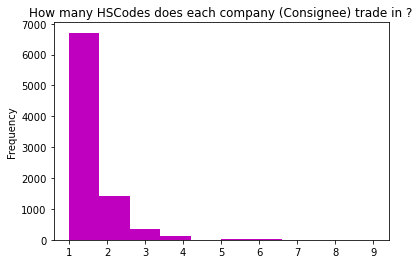

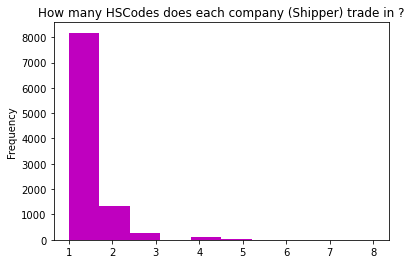

In [3]:

import matplotlib.pyplot as plt
df1 = df[['ConsigneePanjivaID','HSCode']].drop_duplicates().groupby(by=['ConsigneePanjivaID']).size().reset_index(name="count")
plt.figure()
plt.title('How many HSCodes does each company (Consignee) trade in ?')
df1['count'].plot.hist(color='m')
try:
    plt.show()
except:
    pass

import matplotlib.pyplot as plt
df1 = df[['ShipperPanjivaID','HSCode']].drop_duplicates().groupby(by=['ShipperPanjivaID']).size().reset_index(name="count")
plt.figure()
plt.title('How many HSCodes does each company (Shipper) trade in ?')
df1['count'].plot.hist(color='m')
try:
    plt.show()
except:
    pass

